In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-10-26 17:37:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  43.4MB/s    in 6.6s    

2023-10-26 17:38:03 (75.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# unzip the file

zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

for dirpath,dirnames,filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

there are 2 directories and 0 images in '/content/10_food_classes_all_data
there are 10 directories and 0 images in '/content/10_food_classes_all_data/test
there are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ramen
there are 0 directories and 250 images in '/content/10_food_classes_all_data/test/grilled_salmon
there are 0 directories and 250 images in '/content/10_food_classes_all_data/test/pizza
there are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 images in '/content/10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 images in '/content/10_food_classes_all_data/test/sushi
there are 0 directories and 250 images in '/content/10_food_classes_all_data/test/steak
there are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_curry
there are 0 directories and 250 images in '/content/10_food_classes_all_data/test/hamburger
there are 0 directorie

In [5]:
##train and test dir

train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [6]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
# lets view the images randomly

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"image shape : {img.shape}")

  return img

image shape : (384, 512, 3)


array([[[121, 120, 100],
        [131, 129, 108],
        [138, 136, 111],
        ...,
        [138, 126, 100],
        [136, 125,  93],
        [135, 125,  90]],

       [[120, 118,  95],
        [127, 125, 100],
        [136, 132, 105],
        ...,
        [134, 126, 103],
        [134, 127, 101],
        [133, 126,  98]],

       [[123, 119,  92],
        [128, 123,  94],
        [137, 132, 103],
        ...,
        [135, 128, 109],
        [136, 128, 109],
        [137, 129, 110]],

       ...,

       [[ 15,  14,  12],
        [ 15,  14,  12],
        [ 15,  14,  12],
        ...,
        [ 91,  91,  89],
        [ 78,  78,  76],
        [ 66,  66,  64]],

       [[ 15,  14,  12],
        [ 15,  14,  12],
        [ 15,  14,  12],
        ...,
        [ 95,  94,  89],
        [ 85,  84,  80],
        [ 77,  73,  70]],

       [[ 15,  14,  12],
        [ 15,  14,  12],
        [ 15,  14,  12],
        ...,
        [ 99,  96,  89],
        [100,  97,  92],
        [101,  96,  92]]

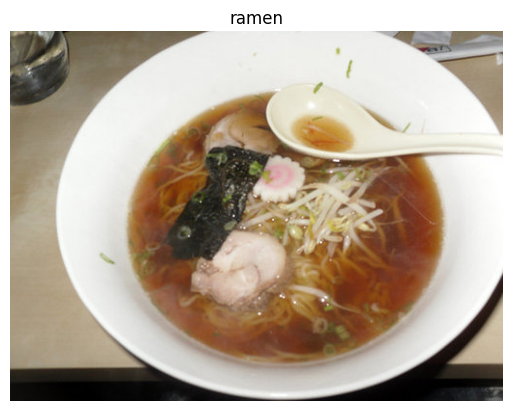

In [8]:
view_random_image(target_dir = train_dir,
                  target_class = random.choice(class_names) )

In [9]:
# preprocessing of data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(
                                            train_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical"
)

test_data = test_datagen.flow_from_directory(
                                            test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
# creating the model architecture

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten


model_1 = Sequential([

                      Conv2D(11,3,activation = "relu",input_shape = (224,224,3)),
                      Conv2D(11,3,activation = "relu"),

                      MaxPool2D(),

                      Conv2D(11,3,activation = "relu"),
                      Conv2D(11,3,activation = "relu"),

                      MaxPool2D(),

                      Flatten(),

                      Dense(50,activation = "relu"),
                      Dense(10,activation = "softmax")

])

model_1.compile(
            loss = "categorical_crossentropy",
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ["accuracy"]
)



In [11]:
history_1 = model_1.fit(
                  train_data,
                  epochs = 5,
                  steps_per_epoch = len(train_data),
                  validation_data = test_data,
                  validation_steps = len(test_data)
)

Epoch 1/5
235/235 [==============================] - 41s 125ms/step - loss: 2.1302 - accuracy: 0.2196 - val_loss: 1.9950 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 30s 128ms/step - loss: 1.9968 - accuracy: 0.2883 - val_loss: 1.9375 - val_accuracy: 0.3268
Epoch 3/5
235/235 [==============================] - 28s 120ms/step - loss: 1.8011 - accuracy: 0.3824 - val_loss: 1.9362 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 1.3574 - accuracy: 0.5367 - val_loss: 2.0673 - val_accuracy: 0.3308
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.8131 - accuracy: 0.7213 - val_loss: 2.8440 - val_accuracy: 0.3016


In [12]:
# evaluation

model_1.evaluate(test_data)

79/79 [==============================] - 6s 79ms/step - loss: 2.8440 - accuracy: 0.3016


[2.843956470489502, 0.30160000920295715]

In [13]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

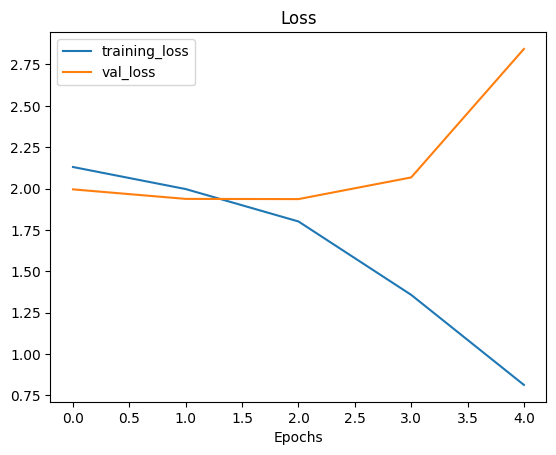

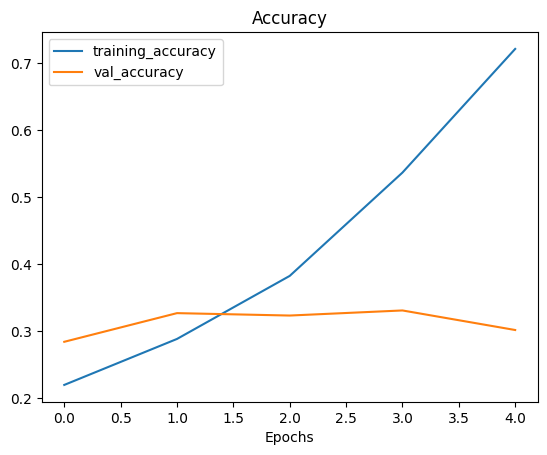

In [14]:
plot_loss_curves(history_1)

In [15]:
# create simplified model

model_2 = Sequential([

                      Conv2D(11,3,activation = "relu",input_shape = (224,224,3)),
                       MaxPool2D(),

                      Conv2D(11,3,activation = "relu"),
                      MaxPool2D(),

                      Flatten(),

                      Dense(50,activation = "relu"),
                      Dense(10,activation = "softmax")

])

model_2.compile(
            loss = "categorical_crossentropy",
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ["accuracy"]
)


In [16]:
history_2 = model_2.fit(
                  train_data,
                  epochs = 5,
                  steps_per_epoch = len(train_data),
                  validation_data = test_data,
                  validation_steps = len(test_data)
)

Epoch 1/5
235/235 [==============================] - 33s 133ms/step - loss: 2.3185 - accuracy: 0.1577 - val_loss: 2.1798 - val_accuracy: 0.2056
Epoch 2/5
235/235 [==============================] - 27s 113ms/step - loss: 2.0595 - accuracy: 0.2588 - val_loss: 2.0604 - val_accuracy: 0.2436
Epoch 3/5
235/235 [==============================] - 27s 115ms/step - loss: 1.7751 - accuracy: 0.3773 - val_loss: 2.0049 - val_accuracy: 0.3056
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 1.4112 - accuracy: 0.5175 - val_loss: 2.2242 - val_accuracy: 0.2816
Epoch 5/5
235/235 [==============================] - 27s 115ms/step - loss: 1.0179 - accuracy: 0.6587 - val_loss: 2.5602 - val_accuracy: 0.2688


In [17]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 2.5602 - accuracy: 0.2688


[2.560185432434082, 0.2687999904155731]

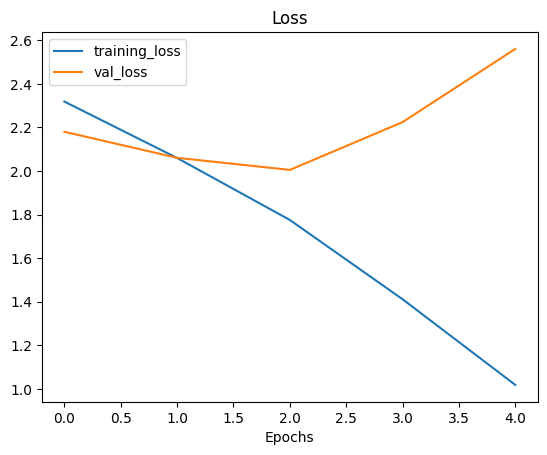

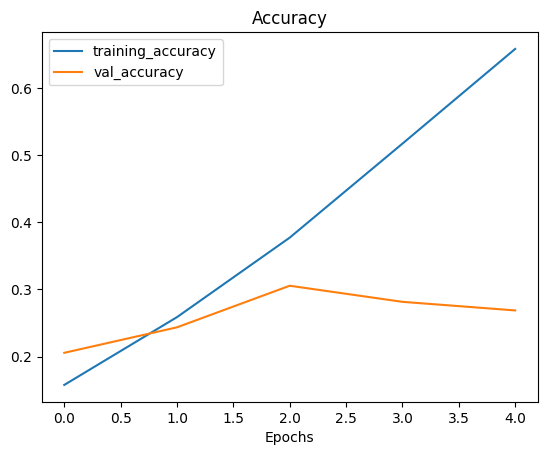

In [18]:
plot_loss_curves(history_2)

In [19]:
## augmentation of data


train_datagen_augmented = ImageDataGenerator(
                                          rescale = 1/255.,
                                          rotation_range = 20,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True
)


train_data_augmented = train_datagen_augmented.flow_from_directory(
                                            train_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical"
)

Found 7500 images belonging to 10 classes.


In [20]:
## cloning of model

model_3 = tf.keras.models.clone_model(model_2)



In [ ]:
model_3.compile(
            loss = "categorical_crossentropy",
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ["accuracy"]
)

history_3 = model_3.fit(
                  train_data_augmented,
                  epochs = 20,
                  steps_per_epoch = len(train_data),
                  validation_data = test_data,
                  validation_steps = len(test_data),
                  use_multiprocessing = True
)

Epoch 1/20
 35/235 [===>..........................] - ETA: 2:55 - loss: 2.2375 - accuracy: 0.1573

Process Keras_worker_ForkPoolWorker-1:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 131, in worker
    put((job, i, result))
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 377, in put
    self._writer.send_bytes(obj)
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 405, in _send_bytes
    self._send(buf)
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
KeyboardInterrupt
Exception in thread Thread-30 (_handle_results):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, i

In [ ]:
model_3.evaluate(test_data)

In [ ]:
plot_loss_curves(history_3)

In [ ]:
def load_and_prep_image(filename,img_shape = 224):

  # read the target file
  img = tf.io.read_file(filename)

  #decode the and read the file and ensure it has 3 channels ie RGB channels
  img = tf.image.decode_image(img,channels = 3)

  # resize the image to size that model was trained on
  img = tf.image.resize(img, size = [img_shape,img_shape])

  # rescale the image to min max scaler ie value ranging between 0-1
  img = img/255

  return img



In [ ]:
def pred_plot(model,filename,class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis = 0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"prediction : {pred_class}")
  plt.axis("off")

In [ ]:
pred_plot(
    model_3,
    "/content/10_food_classes_all_data/train/ramen/1002305.jpg",
    class_names
)

In [ ]:
pred_plot(
    model_3,
    "/content/spicy-ramen-noodles.jpeg",
    class_names
)